In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_1samp
import os

In [9]:
print (os.listdir(r"C:\Users\dogud\Downloads\Kaggle Downloads\schengen-visa-stats"))

['2017-consulates-schengen-visa-stats.xlsx', '2017-data-for-consulates.csv', '2018-consulates-schengen-visa-stats.xlsx', '2018-data-for-consulates.csv']


In [11]:
df = pd.read_excel(r'C:\Users\dogud\Downloads\Kaggle Downloads\schengen-visa-stats\2018-consulates-schengen-visa-stats.xlsx',
                  sheet_name='Data for consulates')

In [13]:
df.head(10)

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV),Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62.0,32.0,10.0,0.312500,21.0,9.0,0.145161,62.0,53.0,9.0,0.145161
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481.0,1658.0,1461.0,0.881182,1.0,822.0,0.331318,2481.0,1659.0,822.0,0.331318
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16.0,16.0,16.0,1.000000,0.0,0.0,0.000000,16.0,16.0,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776.0,2653.0,989.0,0.372786,1.0,122.0,0.043948,2776.0,2654.0,122.0,0.043948
4,Austria,AZERBAIJAN,BAKU,1.0,1.0,1.0,0.0,0.0,1976.0,1895.0,1769.0,0.933509,2.0,79.0,0.039980,1977.0,1898.0,79.0,0.039960
5,Austria,BOSNIA AND HERZEGOVINA,SARAJEVO,NaN,NaN,NaN,NaN,NaN,616.0,615.0,615.0,1.000000,0.0,1.0,0.001623,616.0,615.0,1.0,0.001623
6,Austria,BRAZIL,BRASILIA,NaN,NaN,NaN,NaN,NaN,37.0,37.0,36.0,0.972973,0.0,0.0,0.000000,37.0,37.0,NaN,NaN
7,Austria,BULGARIA,SOFIA,NaN,NaN,NaN,NaN,NaN,217.0,199.0,162.0,0.814070,13.0,5.0,0.023041,217.0,212.0,5.0,0.023041
8,Austria,CANADA,OTTAWA,NaN,NaN,NaN,NaN,NaN,686.0,659.0,107.0,0.162367,1.0,26.0,0.037901,686.0,660.0,26.0,0.037901
9,Austria,CHILE,SANTIAGO DE CHILE,NaN,NaN,NaN,NaN,NaN,22.0,22.0,17.0,0.772727,0.0,0.0,0.000000,22.0,22.0,NaN,NaN


In [14]:
df.columns = [col.strip() for col in df.columns]

In [15]:
print(df.columns)

Index(['Schengen State', 'Country where consulate is located', 'Consulate',
       'Airport transit visas (ATVs) applied for',
       'ATVs issued (including multiple)', 'Multiple ATVs issued',
       'ATVs not issued', 'Not issued rate for ATVs',
       'Uniform visas applied for',
       'Total  uniform visas issued (including MEV)',
       'Multiple entry uniform visas (MEVs) issued',
       'Share of MEVs on total number of uniform visas issued',
       'Total LTVs issued', 'Uniform visas not issued',
       'Not issued rate for uniform visas',
       'Total ATVs and uniform visas applied for',
       'Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs)',
       'Total ATVs and uniform visas not issued',
       'Not issued rate for ATVs and uniform visas'],
      dtype='object')


In [16]:
df.drop([
        'Airport transit visas (ATVs) applied for',
        'ATVs issued (including multiple)',
        'Multiple ATVs issued', 'ATVs not issued',
        'Not issued rate for ATVs',
        'Total ATVs and uniform visas applied for',
        'Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs)',
        'Total ATVs and uniform visas not issued',
        'Not issued rate for ATVs and uniform visas'
        ], axis=1, inplace=True)


In [17]:
df.rename(columns={
                    'Schengen State': 'sch_state',
                    'Country where consulate is located': 'consulate_country',
                    'Consulate': 'consulate_city',
                    'Uniform visas applied for': 'applications',
                    'Total  uniform visas issued (including MEV)': 'uniform_visas_issued',
                    'Multiple entry uniform visas (MEVs) issued': 'mevs_issued',
                    'Share of MEVs on total number of uniform visas issued': 'mevs_share',
                    'Total LTVs issued': 'ltvs_issued',
                    'Uniform visas not issued': 'rejected',
                    'Not issued rate for uniform visas': 'rejection_rate'}, inplace=True)
df = df.dropna(how='all').reset_index(drop=True)

In [19]:
df.head(10)

,sch_state,consulate_country,consulate_city,applications,uniform_visas_issued,mevs_issued,mevs_share,ltvs_issued,rejected,rejection_rate
0,Austria,ALBANIA,TIRANA,62.0,32.0,10.0,0.312500,21.0,9.0,0.145161
1,Austria,ALGERIA,ALGIERS,2481.0,1658.0,1461.0,0.881182,1.0,822.0,0.331318
2,Austria,ARGENTINA,BUENOS AIRES,16.0,16.0,16.0,1.000000,0.0,0.0,0.000000
3,Austria,AUSTRALIA,CANBERRA,2776.0,2653.0,989.0,0.372786,1.0,122.0,0.043948
4,Austria,AZERBAIJAN,BAKU,1976.0,1895.0,1769.0,0.933509,2.0,79.0,0.039980
5,Austria,BOSNIA AND HERZEGOVINA,SARAJEVO,616.0,615.0,615.0,1.000000,0.0,1.0,0.001623
6,Austria,BRAZIL,BRASILIA,37.0,37.0,36.0,0.972973,0.0,0.0,0.000000
7,Austria,BULGARIA,SOFIA,217.0,199.0,162.0,0.814070,13.0,5.0,0.023041
8,Austria,CANADA,OTTAWA,686.0,659.0,107.0,0.162367,1.0,26.0,0.037901
9,Austria,CHILE,SANTIAGO DE CHILE,22.0,22.0,17.0,0.772727,0.0,0.0,0.000000


In [20]:
df.isnull().sum()

sch_state                 3
consulate_country         3
consulate_city            0
applications              2
uniform_visas_issued     33
mevs_issued              82
mevs_share               47
ltvs_issued             477
rejected                180
rejection_rate            9
dtype: int64

In [22]:
df[df.sch_state.isnull()]

,sch_state,consulate_country,consulate_city,applications,uniform_visas_issued,mevs_issued,mevs_share,ltvs_issued,rejected,rejection_rate
1900,NaN,NaN,Selection Sub total in 2018,16016599.0,14265282.0,8325850.0,0.583644,113687.0,1539362.0,0.09611
1901,NaN,NaN,Total worldwide 2018,16016599.0,14265282.0,8325850.0,0.583644,113687.0,1539362.0,0.09611
1902,NaN,NaN,Share of subtotal on worldwide total,1.0,1.0,1.0,NaN,1.0,1.0,NaN


In [23]:
df = df.dropna(axis=0, subset=['sch_state']).reset_index(drop=True)
df.fillna(0, inplace=True)

In [24]:
df['decisions'] = df.uniform_visas_issued + df.ltvs_issued + df.rejected

In [25]:
print('More applications than decisions entries =', len(df[df.decisions < df.applications]))

More applications than decisions entries = 694


In [26]:
print('More decisions than application entries =', len(df[df.decisions > df.applications]))

More decisions than application entries = 55


In [28]:
df['decisions']= df.decisions - df.ltvs_issued
df['applications']= df.applications - df.ltvs_issued

In [29]:
df.drop('ltvs_issued', axis=1, inplace=True)

In [30]:
df['rejection_rate'] = df.rejected/df.decisions

In [31]:
df.head(10)

,sch_state,consulate_country,consulate_city,applications,uniform_visas_issued,mevs_issued,mevs_share,rejected,rejection_rate,decisions
0,Austria,ALBANIA,TIRANA,41.0,32.0,10.0,0.312500,9.0,0.219512,41.0
1,Austria,ALGERIA,ALGIERS,2480.0,1658.0,1461.0,0.881182,822.0,0.331452,2480.0
2,Austria,ARGENTINA,BUENOS AIRES,16.0,16.0,16.0,1.000000,0.0,0.000000,16.0
3,Austria,AUSTRALIA,CANBERRA,2775.0,2653.0,989.0,0.372786,122.0,0.043964,2775.0
4,Austria,AZERBAIJAN,BAKU,1974.0,1895.0,1769.0,0.933509,79.0,0.040020,1974.0
5,Austria,BOSNIA AND HERZEGOVINA,SARAJEVO,616.0,615.0,615.0,1.000000,1.0,0.001623,616.0
6,Austria,BRAZIL,BRASILIA,37.0,37.0,36.0,0.972973,0.0,0.000000,37.0
7,Austria,BULGARIA,SOFIA,204.0,199.0,162.0,0.814070,5.0,0.024510,204.0
8,Austria,CANADA,OTTAWA,685.0,659.0,107.0,0.162367,26.0,0.037956,685.0
9,Austria,CHILE,SANTIAGO DE CHILE,22.0,22.0,17.0,0.772727,0.0,0.000000,22.0


In [32]:
country = 'TURKEY'

In [33]:
df_tr = df[df.consulate_country == country].reset_index(drop=True)

In [34]:
df_tr

,sch_state,consulate_country,consulate_city,applications,uniform_visas_issued,mevs_issued,mevs_share,rejected,rejection_rate,decisions
0,Austria,TURKEY,ANKARA,5306.0,5300.0,562.0,0.106038,6.0,0.001131,5306.0
1,Austria,TURKEY,ISTANBUL,13195.0,10813.0,7983.0,0.738278,2382.0,0.180523,13195.0
2,Belgium,TURKEY,ANKARA,1881.0,1137.0,336.0,0.295515,1097.0,0.491047,2234.0
3,Belgium,TURKEY,ISTANBUL,8463.0,6313.0,3575.0,0.566292,1200.0,0.159723,7513.0
4,Czech Republic,TURKEY,ANKARA,11477.0,11030.0,6586.0,0.597099,444.0,0.038696,11474.0
5,Czech Republic,TURKEY,ISTANBUL,10307.0,9589.0,848.0,0.088435,718.0,0.069661,10307.0
6,Denmark,TURKEY,ANKARA,3813.0,3096.0,1887.0,0.609496,613.0,0.165274,3709.0
7,Denmark,TURKEY,ISTANBUL,4053.0,3879.0,3350.0,0.863625,183.0,0.045052,4062.0
8,Estonia,TURKEY,ANKARA,1106.0,994.0,637.0,0.640845,112.0,0.101266,1106.0
9,Finland,TURKEY,ANKARA,3997.0,2989.0,1942.0,0.649716,928.0,0.236916,3917.0


In [35]:
grouped_df = df_tr.groupby('sch_state').sum().decisions.nlargest(len(df_tr))

In [36]:
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

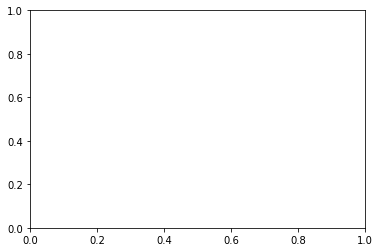

In [37]:
plt.subplot(111)

In [38]:
explode_thr = 16

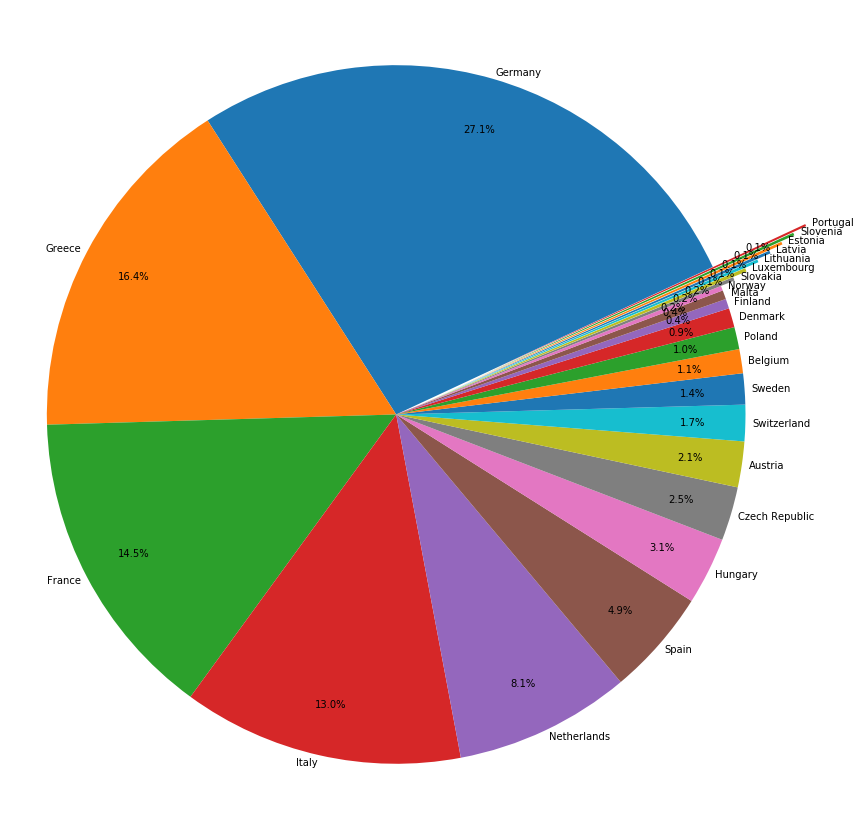

In [43]:
plt.figure(figsize=(15,15))
plt.pie(grouped_df,
        labels=grouped_df.index,
        autopct='%.1f%%', shadow=False, pctdistance=0.85, labeldistance=1.02, startangle=25,
        explode = [0 if i < explode_thr else (i/len(grouped_df))-(explode_thr/len(grouped_df)) for i in range(len(grouped_df))])
plt.axis('equal')
plt.show()

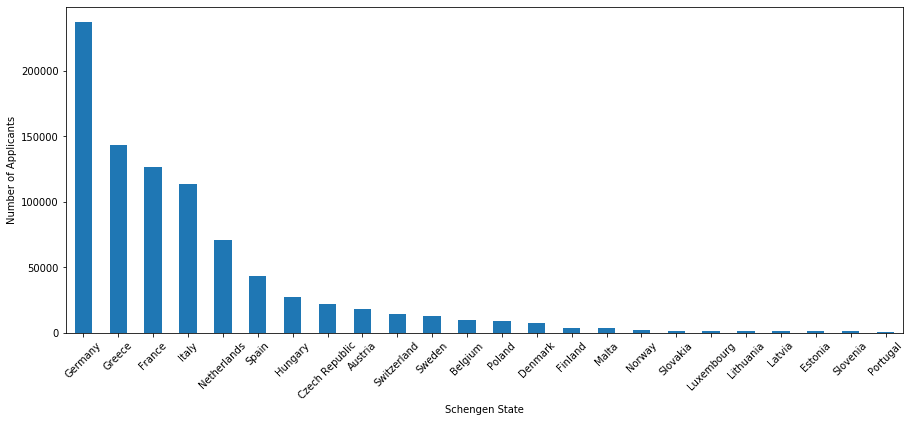

In [44]:
plt.figure(figsize=(15,6))
plt.subplot(111)

chart = grouped_df.plot('bar')
chart.set_xlabel('Schengen State')
chart.set_ylabel('Number of Applicants')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [48]:
df_tr[['sch_state', 'consulate_city', 'decisions', 'mevs_share', 'rejection_rate']]\
.sort_values(by=['rejection_rate'], ascending=True).iloc[:15]

,sch_state,consulate_city,decisions,mevs_share,rejection_rate
27,Malta,ANKARA,1.0,1.000000,0.000000
0,Austria,ANKARA,5306.0,0.106038,0.001131
16,Greece,EDIRNE,19740.0,0.996245,0.015046
40,Spain,ISTANBUL,33051.0,0.261810,0.023933
26,Luxembourg,ANKARA,1436.0,0.975697,0.025766
35,Portugal,ANKARA,890.0,0.582851,0.030337
18,Greece,IZMIR,34034.0,0.924310,0.031851
17,Greece,ISTANBUL,83362.0,0.831680,0.037667
4,Czech Republic,ANKARA,11474.0,0.597099,0.038696
23,Italy,IZMIR,17101.0,0.599732,0.040465


In [50]:
df_tr['score'] = (1 - df_tr['rejection_rate']) * df_tr.mevs_share
min_max_scaler = preprocessing.MinMaxScaler()
df_tr['score'] = min_max_scaler.fit_transform(df_tr[['score']].values)

df_tr[['sch_state', 'consulate_city', 'decisions', 'score']]\
.sort_values(by=['score'], ascending=False).iloc[:15]

,sch_state,consulate_city,decisions,score
27,Malta,ANKARA,1.0,1.000000
16,Greece,EDIRNE,19740.0,0.979576
26,Luxembourg,ANKARA,1436.0,0.946125
33,Poland,ANKARA,2898.0,0.896224
21,Italy,ANKARA,11355.0,0.888684
18,Greece,IZMIR,34034.0,0.885445
13,Germany,ISTANBUL,125625.0,0.873709
20,Hungary,ISTANBUL,20184.0,0.820821
7,Denmark,ISTANBUL,4062.0,0.809003
17,Greece,ISTANBUL,83362.0,0.782454


In [51]:
df_tr[['sch_state', 'consulate_city', 'decisions', 'rejection_rate']]\
.sort_values(by=['rejection_rate'], ascending=False).iloc[:6]

,sch_state,consulate_city,decisions,rejection_rate
2,Belgium,ANKARA,2234.0,0.491047
32,Norway,ANKARA,1909.0,0.400733
15,Greece,ANKARA,6150.0,0.267480
9,Finland,ANKARA,3917.0,0.236916
41,Sweden,ANKARA,4328.0,0.232209
1,Austria,ISTANBUL,13195.0,0.180523


In [52]:
df_tr[['sch_state', 'consulate_city', 'decisions', 'mevs_share']]\
.sort_values(by=['mevs_share'], ascending=True).iloc[:6]

,sch_state,consulate_city,decisions,mevs_share
5,Czech Republic,ISTANBUL,10307.0,0.088435
0,Austria,ANKARA,5306.0,0.106038
39,Spain,ANKARA,10002.0,0.162521
40,Spain,ISTANBUL,33051.0,0.261810
10,France,ANKARA,26910.0,0.275153
2,Belgium,ANKARA,2234.0,0.295515


In [53]:
df_tr[['sch_state', 'consulate_city', 'decisions', 'score']]\
.sort_values(by=['score'], ascending=True).iloc[:6]

,sch_state,consulate_city,decisions,score
5,Czech Republic,ISTANBUL,10307.0,0.000000
0,Austria,ANKARA,5306.0,0.025763
39,Spain,ANKARA,10002.0,0.058404
2,Belgium,ANKARA,2234.0,0.074236
32,Norway,ANKARA,1909.0,0.168350
10,France,ANKARA,26910.0,0.182985


In [54]:
population_decisions = df_tr.decisions.sum()
population_rejects = df_tr.rejected.sum()
population_rejection_mean = population_rejects/population_decisions
print('Average rejection rate in Turkey for Schengen Visas in 2018: {:.2f}%'.format(population_rejection_mean*100))

Average rejection rate in Turkey for Schengen Visas in 2018: 8.50%


In [55]:
top_generous = df_tr[['sch_state', 'consulate_city', 'decisions', 'rejected', 'rejection_rate']]\
.sort_values(by=['rejection_rate'], ascending=True)
top_generous = top_generous[top_generous.rejection_rate < population_rejection_mean]

In [56]:
def hypothesis_testing(df, state):
    null_hytothesis_accepted = []
    null_hytothesis_rejected = []
    for idx, consulate in df.iterrows():
        N = int(consulate.decisions)
        K = int(consulate.rejected) # K rejects, N-K accepts
        arr = np.array([1] * K + [0] * (N-K))
        np.random.shuffle(arr)
        tstat, pval = ttest_1samp(arr, population_rejection_mean)
        if pval < 0.001:
            null_hytothesis_rejected.append(str(consulate.sch_state) + ' in ' + str(consulate.consulate_city))
        else:
            null_hytothesis_accepted.append(str(consulate.sch_state) + ' in ' + str(consulate.consulate_city))
    print('Null Hypothesis REJECTED, {} acceptance rates than average that COULDN\'T happen by chance: \n{}'.format(state, '\n'.join(null_hytothesis_rejected)))
    print('--------------------------------------------------------------------------------------------\n')
    print('Null Hypothesis ACCEPTED, {} acceptance rates than average that COULD have happend by chance: \n{}'.format(state, '\n'.join(null_hytothesis_accepted)))
hypothesis_testing(top_generous, 'better')

Null Hypothesis REJECTED, better acceptance rates than average that COULDN'T happen by chance: 
Austria in ANKARA
Greece in EDIRNE
Spain in ISTANBUL
Luxembourg in ANKARA
Portugal in ANKARA
Greece in IZMIR
Greece in ISTANBUL
Czech Republic in ANKARA
Italy in IZMIR
Denmark in ISTANBUL
Hungary in ANKARA
Slovakia in ISTANBUL
France in ISTANBUL
Italy in ISTANBUL
Hungary in ISTANBUL
Czech Republic in ISTANBUL
Germany in IZMIR
--------------------------------------------------------------------------------------------

Null Hypothesis ACCEPTED, better acceptance rates than average that COULD have happend by chance: 
Malta in ANKARA
Malta in ISTANBUL
Poland in ISTANBUL
Sweden in ISTANBUL


C:\Users\dogud\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\dogud\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dogud\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\dogud\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\dogud\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [57]:
most_strict = df_tr[['sch_state', 'consulate_city', 'decisions', 'rejected', 'rejection_rate']]\
.sort_values(by=['rejection_rate'], ascending=False)
most_strict = most_strict[most_strict.rejection_rate > population_rejection_mean]
hypothesis_testing(most_strict, 'lower')

Null Hypothesis REJECTED, lower acceptance rates than average that COULDN'T happen by chance: 
Belgium in ANKARA
Norway in ANKARA
Greece in ANKARA
Finland in ANKARA
Sweden in ANKARA
Austria in ISTANBUL
Netherlands in ANKARA
Slovenia in ANKARA
Denmark in ANKARA
Spain in ANKARA
Germany in ANKARA
Belgium in ISTANBUL
Lithuania in ANKARA
Germany in ISTANBUL
Netherlands in IZMIR
Netherlands in ISTANBUL
Switzerland in ISTANBUL
--------------------------------------------------------------------------------------------

Null Hypothesis ACCEPTED, lower acceptance rates than average that COULD have happend by chance: 
Estonia in ANKARA
Latvia in ANKARA
Slovakia in ANKARA
Poland in ANKARA
France in ANKARA
Italy in ANKARA


In [58]:
df[df.mevs_issued> df.uniform_visas_issued]

,sch_state,consulate_country,consulate_city,applications,uniform_visas_issued,mevs_issued,mevs_share,rejected,rejection_rate,decisions
13,Austria,CROATIA,ZAGREB,238.0,224.0,235.0,1.049107,14.0,0.058824,238.0
20,Austria,INDIA,NEW DELHI,36794.0,34792.0,34812.0,1.000575,2002.0,0.054411,36794.0
35,Austria,NORTH MACEDONIA,SKOPJE,356.0,15.0,922.0,61.466667,341.0,0.957865,356.0
41,Austria,SAUDI ARABIA,RIYADH,9531.0,9179.0,12148.0,1.323456,352.0,0.036932,9531.0
46,Austria,SOUTH AFRICA,PRETORIA,5744.0,5615.0,6255.0,1.113980,129.0,0.022458,5744.0
710,Greece,ALBANIA,KORCE,9.0,8.0,15.0,1.875000,1.0,0.111111,9.0
735,Greece,CROATIA,ZAGREB,13.0,13.0,14.0,1.076923,0.0,0.000000,13.0
757,Greece,KOSOVO,PRISTINA,883.0,314.0,4649.0,14.805732,569.0,0.644394,883.0
778,Greece,SERBIA,BELGRADE,210.0,210.0,212.0,1.009524,0.0,0.000000,210.0
799,Greece,USA,"CHICAGO, IL",601.0,596.0,601.0,1.008389,5.0,0.008319,601.0


In [59]:
world_rejects = df[~df.consulate_country.isin([sch_state.upper() for sch_state in df.sch_state.values])]\
                .groupby('consulate_country').sum()\
                .groupby(level=0).filter(lambda x: x.decisions > 100)
world_rejects['rejection_rate'] = world_rejects.rejected/world_rejects.decisions
highest_rejections = world_rejects.sort_values(by=['rejection_rate'], ascending=False).drop(['mevs_issued', 'mevs_share'], axis=1)
print('{} is the {}th hardest country to get a schengen visa from {} total countries'.format(country, highest_rejections.index.get_loc(country), len(highest_rejections)))

world_mevs = df[(df.mevs_share <= 1) & (~df.consulate_country.isin([sch_state.upper() for sch_state in df.sch_state.values]))]\
                .groupby('consulate_country').sum()\
                .groupby(level=0).filter(lambda x: x.decisions > 100)
world_mevs['mevs_share'] = world_mevs.mevs_issued/world_mevs.uniform_visas_issued
lowest_mevs = world_mevs.sort_values(by=['mevs_share'], ascending=True)
print('{} is the {}th hardest country to get a MEV schengen visa from {} total countries'.format(country, lowest_mevs.index.get_loc(country), len(lowest_mevs)))

TURKEY is the 74th hardest country to get a schengen visa from 134 total countries
TURKEY is the 115th hardest country to get a MEV schengen visa from 134 total countries


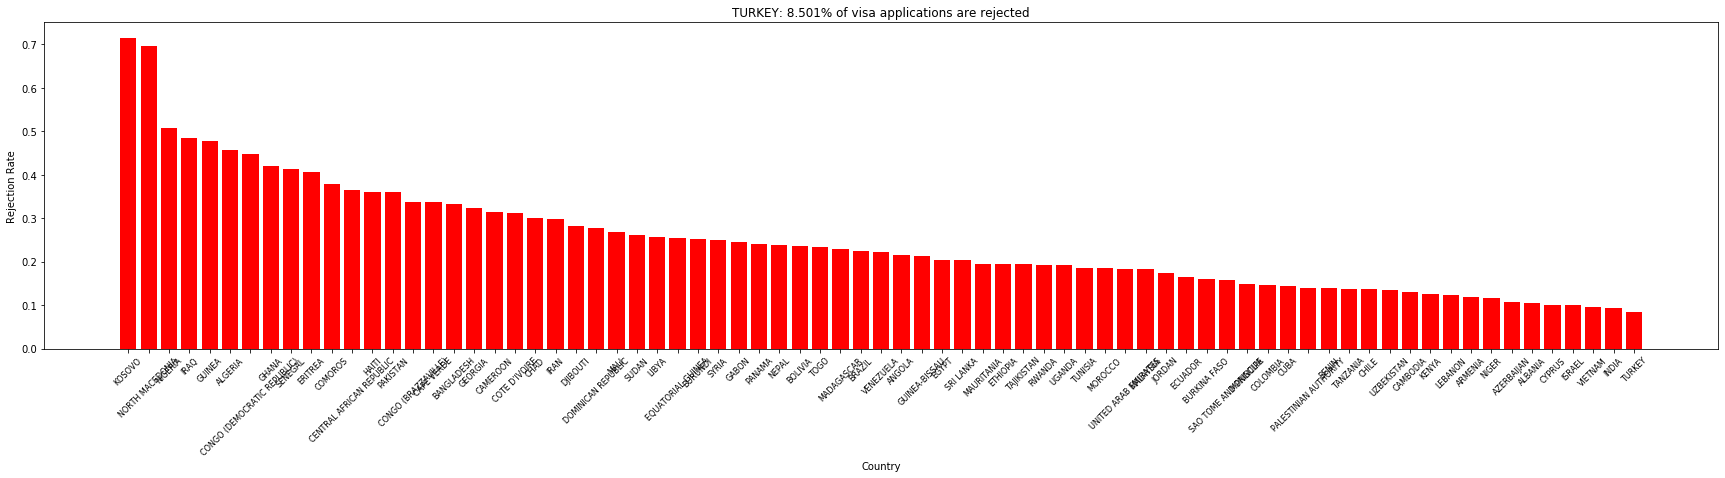

In [60]:
plt.figure(figsize=(30,6))
plt.title('{}: {:.3f}% of visa applications are rejected'.format(country, highest_rejections.loc[country].rejection_rate*100))
plt.bar(highest_rejections.iloc[:highest_rejections.index.get_loc(country) + 1].index, highest_rejections.iloc[:highest_rejections.index.get_loc(country) + 1].rejection_rate, color='r')
plt.xlabel('Country')
plt.ylabel('Rejection Rate')
plt.xticks(rotation=45, fontsize=8)
plt.show()

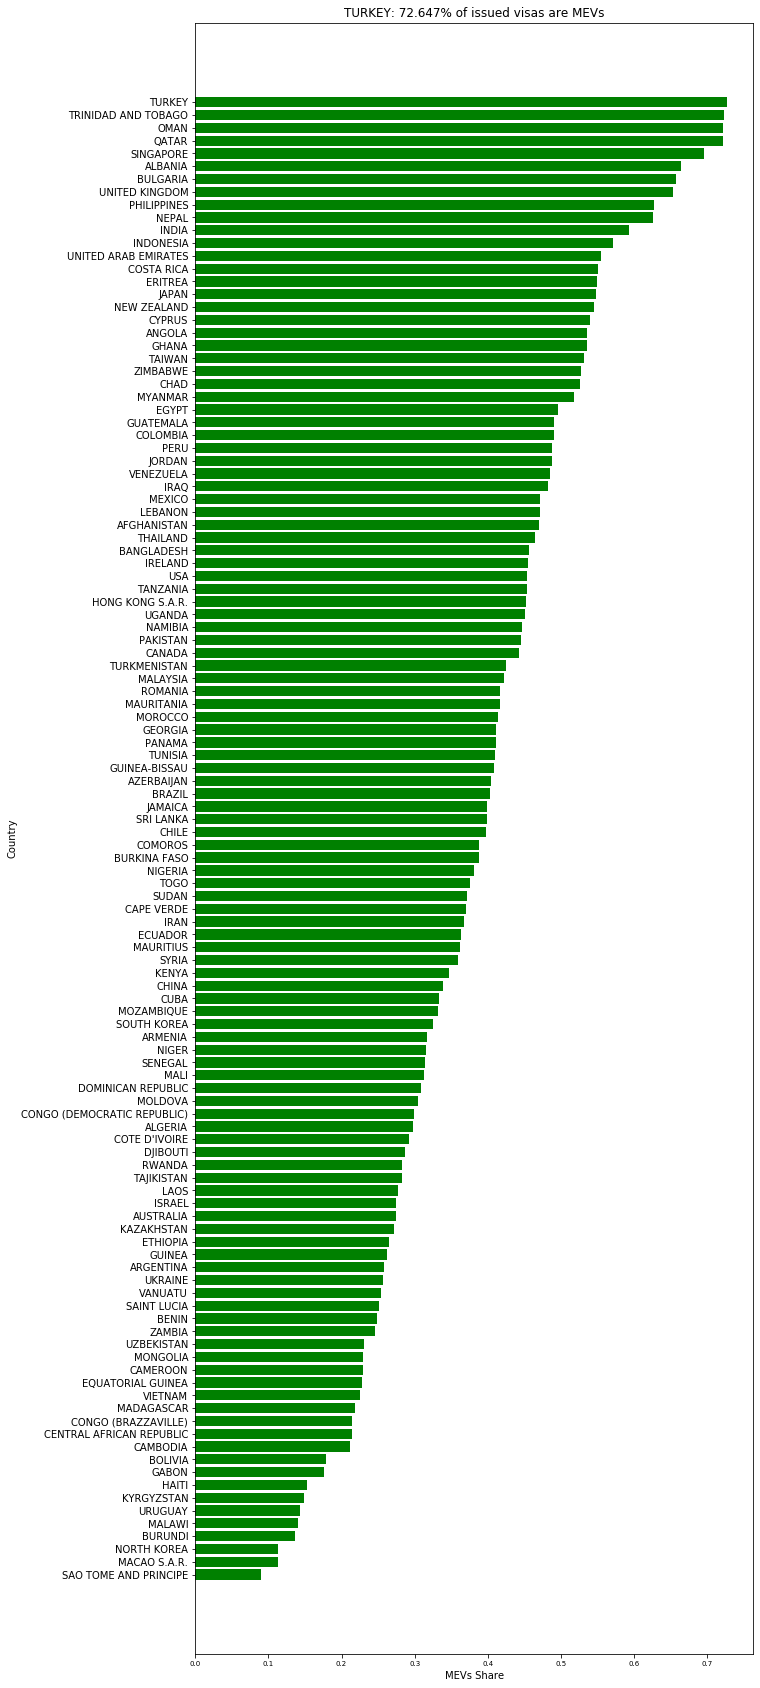

In [61]:
# MEVs Share:
plt.figure(figsize=(10,30))
#plt.subplot(111)
plt.barh(lowest_mevs.iloc[:lowest_mevs.index.get_loc(country) + 1].index, lowest_mevs.iloc[:lowest_mevs.index.get_loc(country) + 1].mevs_share, color='g')
plt.title('{}: {:.3f}% of issued visas are MEVs'.format(country, lowest_mevs.loc[country].mevs_share*100))
plt.xlabel('MEVs Share')
plt.ylabel('Country')
plt.axis('tight')
plt.xticks(rotation=0, fontsize=7)
plt.show()